In [25]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import viz_tools

%matplotlib inline

In [21]:
bathy = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)

In [69]:
# Make idealized bathymetry
j, i = bathy.Bathymetry.shape
x = np.arange(i)
y = np.arange(j)
x, y = np.meshgrid(x, y, indexing='xy')
z = -1 * (np.cosh((x - 200)/12)*20 + np.cosh((y - 550)/35)) + 400
zz = z - 1000 * np.exp(-((x - 210)/10)**2 - ((y - 610)/40)**2)
z[z < 0] = 0
zz[zz < 0] = 0

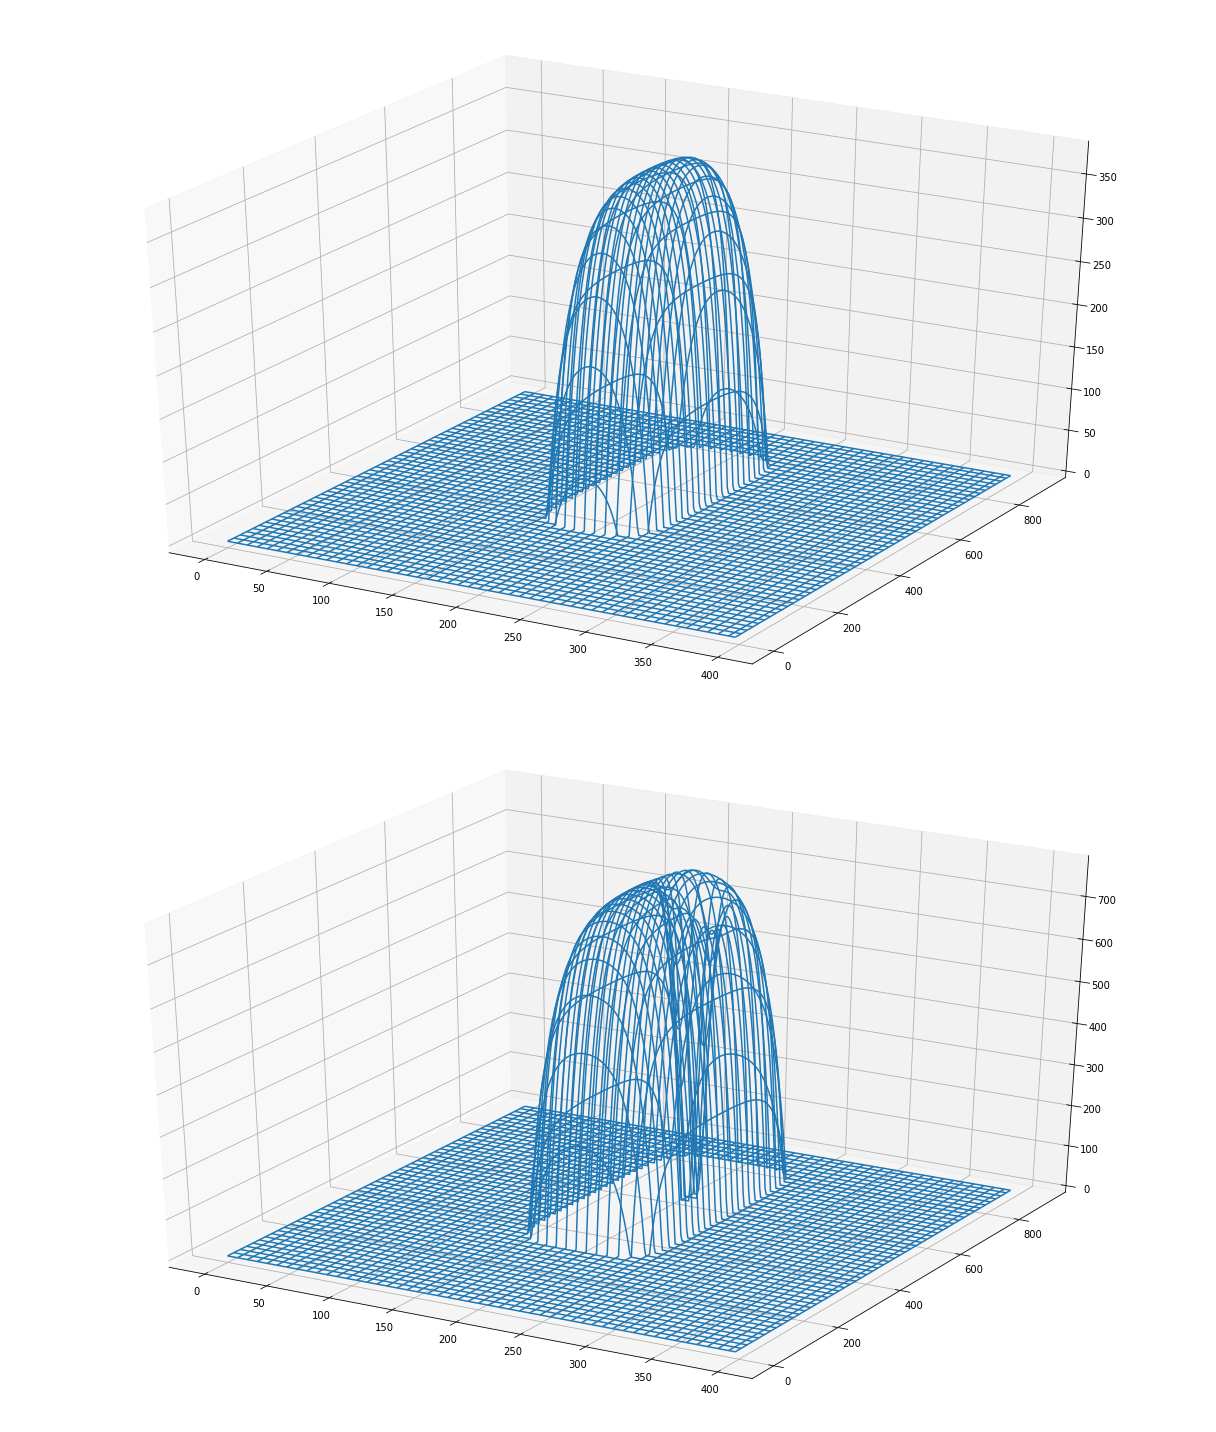

In [68]:
fig = plt.figure(figsize=(17, 20))
for col, Z in zip([1, 2], [z, zz]):
    ax = fig.add_subplot(2, 1, col, projection='3d')
    ax.plot_wireframe(x, y, Z)
    #ax.set_zlim([400, 0])

fig.tight_layout()
plt.show()

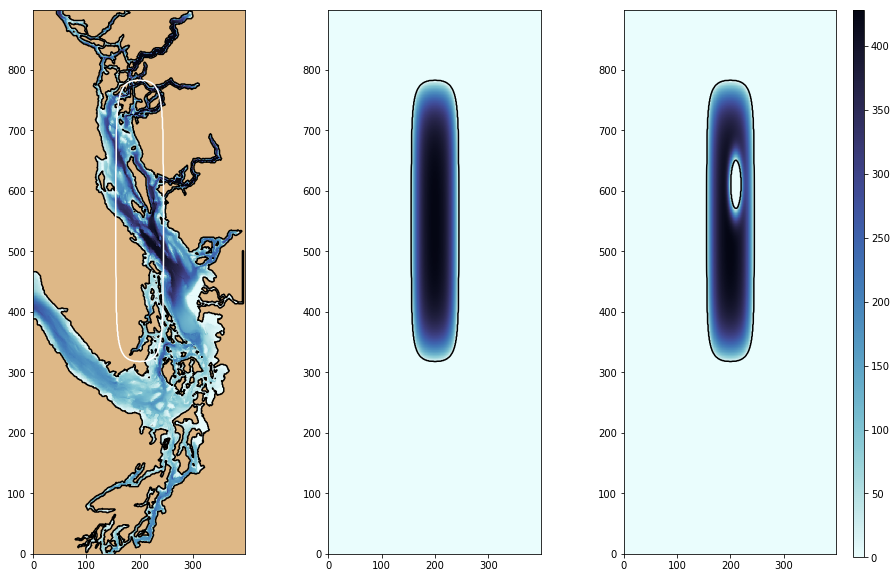

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for ax in axs:
    ax.set_xlim([0, 398])
    ax.set_ylim([0, 898])
    viz_tools.set_aspect(ax)

c = axs[0].pcolormesh(bathy.Bathymetry, cmap=cmocean.cm.ice_r)
axs[0].contourf(bathy.Bathymetry, levels=[-0.01, 0.01], colors='burlywood')
axs[0].contour(bathy.Bathymetry, levels=[-0.01, 0.01], colors='k')
axs[0].contour(z, levels=1, colors='w')

axs[1].pcolormesh(z, cmap=cmocean.cm.ice_r)
axs[1].contour(z, levels=1, colors='k')

axs[2].pcolormesh(zz, cmap=cmocean.cm.ice_r)
axs[2].contour(zz, levels=1, colors='k')

cax = fig.add_axes([0.9, 0.12, 0.01, 0.76])
fig.colorbar(c, cax=cax)